## 1. The raw data files and their format

While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction.

By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of  states with similar profiles. **How can we find such groups in a statistically sound way and communicate the result effectively?**

The data given to us was originally collected by the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners. This particular dataset was compiled and released as a <a href="https://github.com/fivethirtyeight/data/tree/master/bad-drivers">CSV-file</a> by FiveThirtyEight under the <a href="https://github.com/ﬁvethirtyeight/data">CC-BY4.0 license

In [1]:
# Check the name of the current folder
current_dir = !pwd
print(current_dir)

# List all files in this folder
file_list = !ls
print(file_list)

# List all files in the datasets directory
dataset_list = !ls "datasets/"
print(dataset_list)

# View the first 20 lines of datasets/road-accidents.csv
accidents_head = !head -20 "datasets/road-accidents.csv" 
accidents_head

['/c/Users/Pandey/Desktop/Mini Project 3']
['Untitled.ipynb', 'datasets', 'notebook.ipynb']
['miles-driven.csv', 'road-accidents.csv']


['##### LICENSE #####',
 '# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)',
 '# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)',
 '##### COLUMN ABBREVIATIONS #####',
 '# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)',
 '# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',
 '# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
 '# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)',
 '##### DATA BEGIN #####',
 'state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time',
 'Alabama|18.8|39|30|80',
 'Alaska|18.1|41|25|94',
 'Arizona|18.6|35|28|96',
 'Arkansas|22.4|18|26|95',
 'California|12|35|28|89',
 'Colorado|13.6|37|28|95',

## 2. Read in the data

In [2]:
# Import the `pandas` module as "pd"
import pandas as pd

# Read in `road-accidents.csv`
car_acc = pd.read_csv('datasets/road-accidents.csv', delimiter="|", header=9 )

# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

car_acc.columns = ['state', 'FatalAcc_PBM', 'Speeding_Perc', 'DUI_Perc', '1st_Time_Perc']

# Generate an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)

# Display the last five rows of the DataFrame
car_acc.tail()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state            51 non-null object
FatalAcc_PBM     51 non-null float64
Speeding_Perc    51 non-null int64
DUI_Perc         51 non-null int64
1st_Time_Perc    51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,FatalAcc_PBM,Speeding_Perc,DUI_Perc,1st_Time_Perc
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


## 3. Summarize data 

       FatalAcc_PBM  Speeding_Perc   DUI_Perc  1st_Time_Perc
count     51.000000      51.000000  51.000000       51.00000
mean      15.790196      31.725490  30.686275       88.72549
std        4.122002       9.633438   5.132213        6.96011
min        5.900000      13.000000  16.000000       76.00000
25%       12.750000      23.000000  28.000000       83.50000
50%       15.600000      34.000000  30.000000       88.00000
75%       18.500000      38.000000  33.000000       95.00000
max       23.900000      54.000000  44.000000      100.00000


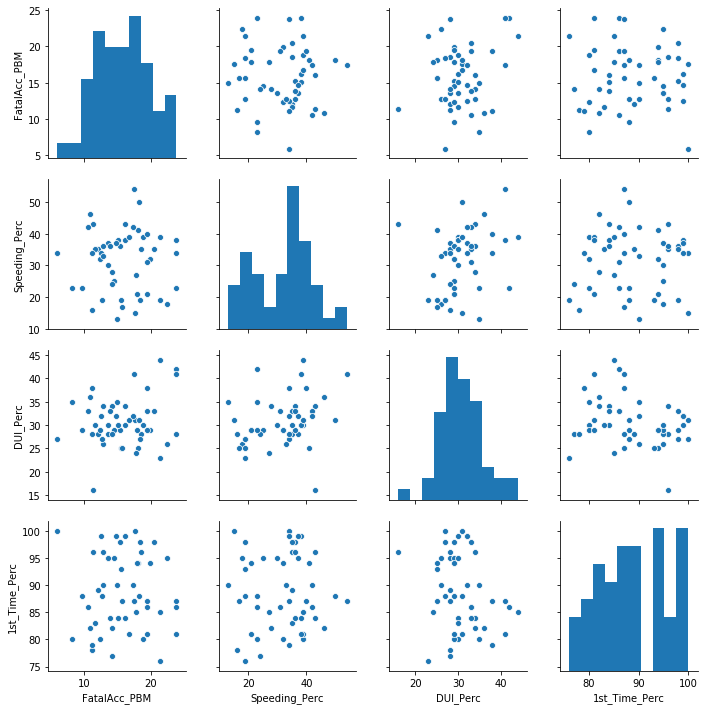

In [3]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

# Create a pairwise scatter plot to explore the data
sns.pairplot(car_acc)

(4.0, 0.0)

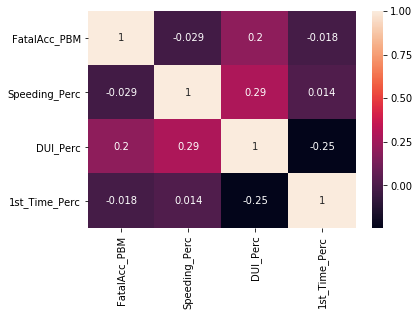

In [4]:
# Compute the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

ax=sns.heatmap(corr_columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Feature importance

Using linear regression coefficients we can estimate feature importances.

In [5]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc.drop(['state','FatalAcc_PBM'], axis=1)
target = car_acc['FatalAcc_PBM']

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

## 6. Perform PCA on standardized data

We have learned that alcohol consumption is weakly associated with the number of fatal accidents across states. This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. But there are also associations between  alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.

The cumulative variance of the first two principal components is 0.7947


array([0.4567308 , 0.33796706, 0.20530214])

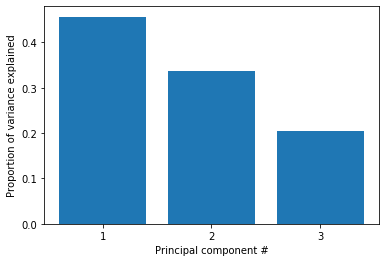

In [6]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

pca.explained_variance_ratio_

## 7. Visualize the first two principal components

The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents.

We will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.

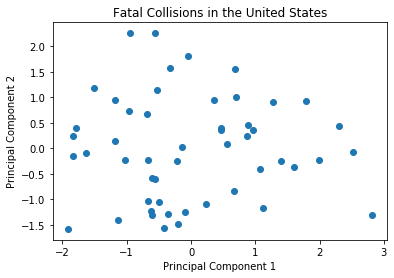

In [7]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)
plt.title("Fatal Collisions in the United States")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## 8. Find clusters of similar states in the data

To identify how many groups exist we will use KMeans Unsupervised CLustering. 

To identify a reasonable number of clusters, we can use KMeans clustering by creating a scatter plot and finding the "elbow", which is an indication of when the addition of more clusters does not add much explanatory power.

Text(0.5, 1.0, 'Elbow Method')

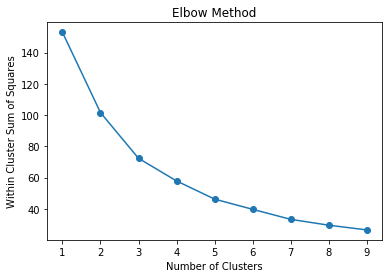

In [8]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow Method")

## 9. KMeans to visualize clusters in the PCA scatter plot

Text(0.5, 1.0, 'K-Means Clustering')

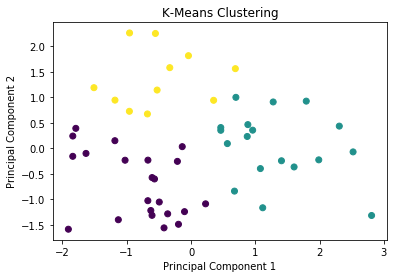

In [9]:
# Create a KMeans object with 3 clusters
km = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)
plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.title("K-Means Clustering")

## 10. Visualize the feature differences between the clusters

The next step in our analysis is to explore how the three clusters are different in terms of the three features that we used for clustering. Instead of using the scaled features, we return to using the unscaled features to help us interpret the differences.

Text(0, 0.5, 'Percentage')

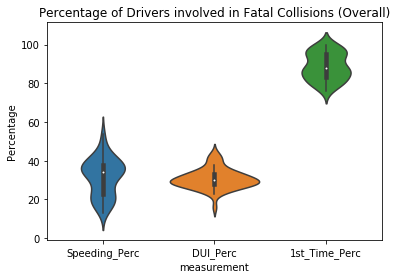

In [10]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars='cluster', var_name='measurement',
                  value_name='percent', value_vars=features.columns)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(data=melt_car,x='measurement', y='percent')
plt.title("Percentage of Drivers involved in Fatal Collisions (Overall)")
plt.ylabel("Percentage")

## 11. Compute the number of accidents within each cluster

Different groups of states may require different interventions. Since resources and time are limited, it is useful to start off with an intervention in one of the three groups first.

To count the EXACT NUMBER of FATAL collisions we will use the data of number of miles driven in each state.

,count,mean,sum
cluster,,,
0,22,898.378595,19764.3291
1,18,911.406439,16405.3159
2,11,860.505945,9465.5654


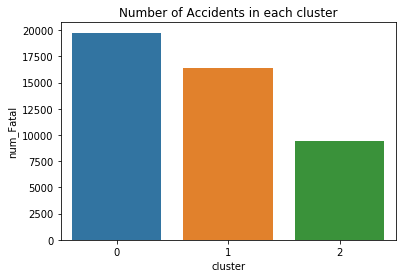

In [11]:
# Read in the new dataset
miles_driven = pd.read_csv('datasets/miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = car_acc.merge(miles_driven, on='state')

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_Fatal'] = car_acc_miles['FatalAcc_PBM']*car_acc_miles['million_miles_annually']/1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_Fatal', data=car_acc_miles, estimator=sum, ci=None)
plt.title("Number of Accidents in each cluster")

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster').agg(['count', 'mean', 'sum'])['num_Fatal']
count_mean_sum

## 12. Make a decision when there is no clear right choice

As we can see, there is no obvious correct choice regarding which cluster is the most important to focus on. Yet, we can still argue for a certain cluster and motivate this using our findings above.

## Conclusions
- Most of the deaths from road accidents occur with drivers who have never been involved in any kind of road accident before. In other words, “first timers” in accidents are more likely to die.

- This number is even higher for states belonging to cluster 1. 


## Suggestions
- Extra measures should be taken to spread awareness about these statistics.
- If people who’ve never been in an accident,  know that their chances of dying after an accident are SIGNIFICANTLY higher then they might take cautionary measures while driving.
- Speed limits and traffic law should be strictly enforced.
